In [119]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [132]:
df = pd.read_csv('steam_games.csv')

## 1 - Opis zbioru danych

In [121]:
print(f"Wielkość zbioru danych: {df.shape}")
print(f"Liczba braków danych: {df.isnull().sum().sum()}") # jest 0, w szczegolnosci 0 brakow w kazdej kolumnie => nie ma sensu rozpisywac kolumna po kolumnie
print(f"Typy zmiennych:\n{df.dtypes}")

Wielkość zbioru danych: (71429, 21)
Liczba braków danych: 0
Typy zmiennych:
steam_appid              int64
name                    object
developers              object
publishers              object
categories              object
genres                  object
required_age             int64
n_achievements           int64
platforms               object
is_released               bool
release_date            object
additional_content      object
total_reviews            int64
total_positive           int64
total_negative           int64
review_score           float64
review_score_desc       object
positive_percentual    float64
metacritic               int64
is_free                   bool
price_initial (USD)    float64
dtype: object


## 2 - Analiza zmiennych

In [122]:
ilosciowe = [
    'required_age',
    'n_achievements',
    'total_reviews',
    'total_positive',
    'total_negative',
    'review_score',
    'positive_percentual',
    'metacritic',
    'price_initial (USD)'
]

print(f"=== Statystyki opisowe dla zmiennych ilościowych ===")
print(df[ilosciowe].describe().drop(index='count'))
print(f"=== Daty wydania ===")
print(f"Najwcześniejsza data wydania: {df['release_date'].min()}\nNajpóźniejsza data wydania: {df['release_date'].max()}")
print(f"=== Procent gier darmowych ===")
print(f"Liczba gier darmowych to {df['is_free'].sum()} z {len(df)}, co daje {round(df['is_free'].sum()/len(df)*100, 2)}%")

print(f"Ile wartości z kolumn 'required_age' i 'metacritic' jest równych: {(df['required_age'] == df['metacritic']).sum()}")


=== Statystyki opisowe dla zmiennych ilościowych ===
      required_age  n_achievements  total_reviews  total_positive  \
mean      2.573227       16.079478   4.102497e+02    3.602238e+02   
std      13.591997      138.084319   8.389934e+03    7.409672e+03   
min       0.000000        0.000000   0.000000e+00    0.000000e+00   
25%       0.000000        0.000000   0.000000e+00    0.000000e+00   
50%       0.000000        0.000000   2.000000e+00    2.000000e+00   
75%       0.000000       16.000000   1.900000e+01    1.400000e+01   
max      97.000000     9821.000000   1.279700e+06    1.107275e+06   

      total_negative  review_score  positive_percentual  metacritic  \
mean       50.025886      2.192849            46.113290    2.573227   
std      1171.055349      3.175885            41.961702   13.591997   
min         0.000000      0.000000             0.000000    0.000000   
25%         0.000000      0.000000             0.000000    0.000000   
50%         0.000000      0.000000     

### Kluczowe wnioski
1. Co najmniej 75% gier nie ma ograniczeń wiekowych, pojedyncze tytuły zawyzają średnią (2.57). Wartości te wyglądają dziwnie, z doświadczenia wiem, ze większość gier ma ograniczenia wiekowe, bo jest to wymagane prawnie. 
2. Co najmniej Połowa gier nie ma osiągnięć, niewielka ich ilość ma tysiące znacznie podwyzszając odchylenie standardowe
3. Większość gier ma mało recenzji. Zdarzają się jednak gry mające ponad milion recenzji, znacznie zawyzają średnią. 
4. Średnio gracze nie oceniają gier pozytywnie. Tylko 25% gier ma co najmniej 88% pozytywnych opinii. Nalezy jednak pamiętać, ze część tych gier ma mało recenzji, stąd wynik moze nie oddawać dobrze rzeczywistości.
5. Co najmniej 75% gier nie ma recenzji od krytyków lub ma ocenę 0. Moze to oznaczać, ze krytycy rzadziej oceniają nie mainstreamowe tytuły. Średnia tych ocen jest bardzo niska (2.57)
6. Kolumny 'required_age' i 'metacritic' są w rzeczywistości sobie równe. Pomimo braku 'oficjalnej' informacji czym jest 'metacritic', odkryłem ze są to oceny krytyków. Ewidentnie mamy do czynienia z jakimś błędem danych. Bardziej prawdopodbne jest, ze dane w tej kolumnie odzwierciedlają oceny krytyków, niz ograniczenia wiekowe. 
7. W momencie wydania co najmniej 25% gier było darmowych. Jednak zgodnie z kolumną 'is_free' tylko 13.36% gier jest darmowych. Mozliwe, ze wdarł się tu błąd lub brak danych, jednak myślę ze 'is_free' przedstawia aktualny stan cen, które mogły zwiększyć się juz po premierze, co pokazuje ze produceni zwiększają ceny gry w czasie. 
8. Mamy szeroki zakres danych, obejmuje on gry wydane nawet przed 2000 rokiem i zawiera gry jeszcze niewydane. 

## 3 - Analiza zmiennych numerycznych względem zmiennej jakościowej 'review_scores_desc'

In [123]:
# Wybieramy tylko niektóre wartości z 'review_scores_desc', bo część wartosci nie odnosi sie od oceny tylko do ilosci ocen, wyjatkiem jest wartosc No user reviews, ktora jest akceptowalna

vals = [
    'No user reviews', 'Overwhelmingly Negative', 'Very Negative', 
    'Negative', 'Mostly Negative', 
    'Mixed', 'Mostly Positive', 'Positive',  
    'Very Positive', 'Overwhelmingly Positive'
    ]

nums = [
    'total_reviews',
    'positive_percentual',
    'review_score',
    'metacritic',
    'price_initial (USD)'
]

df_c = df[df['review_score_desc'].isin(vals)]
grouped = df_c.groupby('review_score_desc', sort=False)[nums]
stats = grouped.agg(['count', 'mean', 'median', 'std'])
stats = stats.reindex(vals)
stats


total_reviews                                      \
                                count          mean  median           std   
review_score_desc                                                           
No user reviews                 26812      0.000000     0.0      0.000000   
Overwhelmingly Negative             4   1894.000000  1766.5    808.308934   
Very Negative                      25    121.000000    78.0     96.219800   
Negative                          133     17.037594    14.0      7.755161   
Mostly Negative                   806    113.946650    21.0    812.667986   
Mixed                            5730    337.935951    33.0   5225.140644   
Mostly Positive                  4224    526.579309    54.0   3666.833610   
Positive                         6076     22.048716    19.0     10.702037   
Very Positive                    6399   2572.033599   210.0  23793.168383   
Overwhelmingly Positive           582  14382.829897  2459.5  42300.362128   

                        positive_percentual                              \
                                      count       mean median       std   
review_score_desc                                                         
No user reviews                       26812   0.000000   0.00  0.000000   
Overwhelmingly Negative                   4  16.475000  16.40  1.431491   
Very Negative                            25  13.912000  15.10  4.321007   
Negative                                133  12.403759  14.30  5.857363   
Mostly Negative                         806  31.772705  33.05  5.278742   
Mixed                                  5730  58.081710  60.00  8.429420   
Mostly Positive                        4224  74.986340  75.00  2.900790   
Positive                               6076  91.140652  91.10  6.599712   
Very Positive                          6399  89.189764  89.30  5.131433   
Overwhelmingly Positive                 582  96.660309  96.50  1.137041   

                        review_score                  metacritic             \
                               count mean median  std      count       mean   
review_score_desc                                                             
No user reviews                26812  0.0    0.0  0.0      26812   0.037521   
Overwhelmingly Negative            4  1.0    1.0  0.0          4  34.000000   
Very Negative                     25  2.0    2.0  0.0         25   4.720000   
Negative                         133  3.0    3.0  0.0        133   0.812030   
Mostly Negative                  806  4.0    4.0  0.0        806   2.447891   
Mixed                           5730  5.0    5.0  0.0       5730   5.744852   
Mostly Positive                 4224  6.0    6.0  0.0       4224   7.750947   
Positive                        6076  7.0    7.0  0.0       6076   0.766129   
Very Positive                   6399  8.0    8.0  0.0       6399  14.307704   
Overwhelmingly Positive          582  9.0    9.0  0.0        582  27.836770   

                                          price_initial (USD)             \
                        median        std               count       mean   
review_score_desc                                                          
No user reviews            0.0   1.658335               26812   1.997568   
Overwhelmingly Negative   36.0  28.296054                   4   7.492500   
Very Negative              0.0  16.346559                  25   8.150000   
Negative                   0.0   6.850293                 133   7.719774   
Mostly Negative            0.0  11.463651                 806   9.211104   
Mixed                      0.0  18.614803                5730  10.340665   
Mostly Positive            0.0  22.260699                4224  11.762218   
Positive                   0.0   7.378968                6076   8.827823   
Very Positive              0.0  30.059910                6399  14.024038   
Overwhelmingly Positive    0.0  39.524356                 582  16.372526   

                             

### Kluczowe wnioski
Widzimy, ze skrajne 'typy ocen' mają zwykle więcej ocen. Mają tez mniejsze odchylenia standardowe procentu ocen pozytywnych, co pokazuje ze w tych przypadkach recenzenci są raczej jednogłośni. 
Na podstawie przedstawionych statystyk mozna tez stwierdzić jak przydzielane są wartości w 'review_score'. W kolumnie 'metacritic' wartości są wyzsze dla gier słabo ocenianych(co trochę poddaje pod wątpliwość moją wcześniejszą interpretację tej kolumny). Dobrze oceniane gry są z reguły drozsze niz inne/

## 4 - Analiza rozkładu zmiennej 'genres'

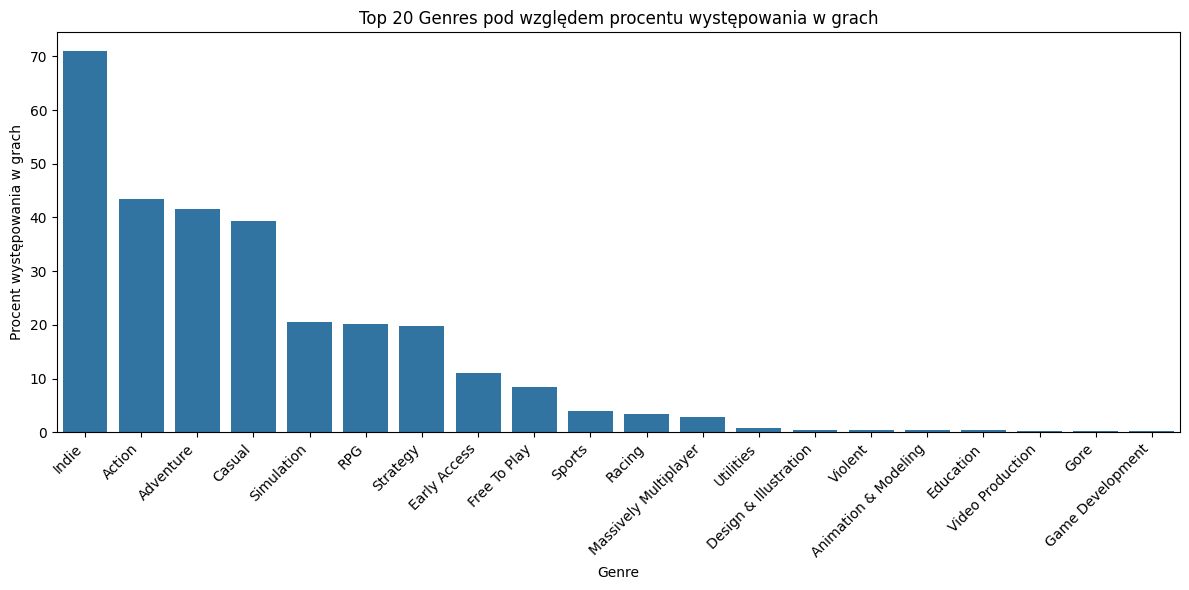

In [124]:
genres_split = df['genres'].str.strip('[]').str.replace("'", "").str.split(',')
genres_series = genres_split.explode().str.strip()
genres_series = genres_series[genres_series != '']

genre_counts = genres_series.value_counts().reset_index()
genre_counts.columns = ['genre', 'count']
genre_counts['percent'] = genre_counts['count'] / len(df) * 100

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts.head(20), x='genre', y='percent')
plt.xlabel('Genre')
plt.ylabel('Procent występowania w grach')
plt.title('Top 20 Genres pod względem procentu występowania w grach')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Kluczowe wnioski
Większość gier nalezy do kategorii 'Indie'. Spora część do kategorii 'Action', 'Adventure', 'Casual'. 
Około 20% gier nalezy do kategorii 'Simulation', 'Strategy', 'RPG. Widzimy, ze mała część gier (niecałe 10%) jest Free To Play. Bardzo mało gier nalezy do kategorii bardziej niszowych, takich jak 'Design and Illustration'. Cieszyć moze mały odsetek gier w kategorii 'Violent'.


## 5 - Zalezności między zmiennymi

### a) Procent gier posiadających oceny

/var/folders/f1/jg_j0x4x2dsc80qv20x17hgm0000gn/T/ipykernel_48252/1725122912.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


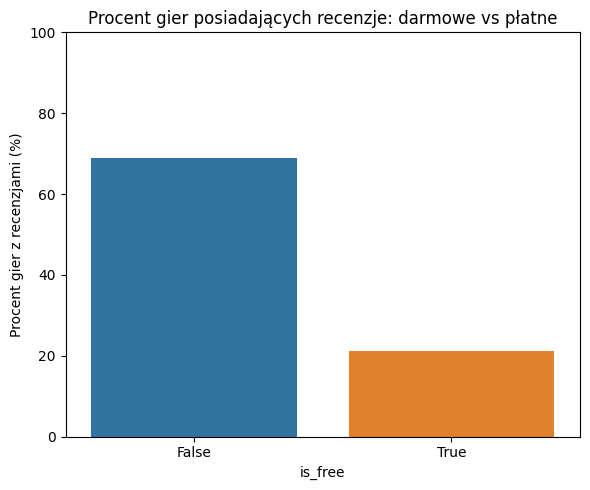

In [136]:
total_counts = df.groupby('is_free').size()
with_reviews = df[df['total_reviews'] > 0].groupby('is_free').size()
percent_with_reviews = (with_reviews / total_counts * 100).reset_index()
percent_with_reviews.columns = ['is_free', 'percent_with_reviews']

plt.figure(figsize=(6, 5))
sns.barplot(
    data=percent_with_reviews,
    x='is_free',
    y='percent_with_reviews',
    palette=['#1f77b4', '#ff7f0e']
);
plt.ylim(0, 100)
plt.xlabel('is_free')
plt.ylabel('Procent gier z recenzjami (%)')
plt.title('Procent gier posiadających recenzje: darmowe vs płatne')
plt.tight_layout()
plt.show()

#### Kluczowe wnioski
Blisko 70% gier płatnych ma co najmniej jedną recenzję. Z kolei tylko około 20% gier darmowych moze pochwalić się posiadaniem recenzji. Moze być to spowodowane większą popularnością gier płatnych, ale takze większą chęcia do wyrazenia swojej opinii na temat produktu, po tym jak się za niego zapłaciło. 


### b) - Liczba wydawanych gier na przestrzeni lat

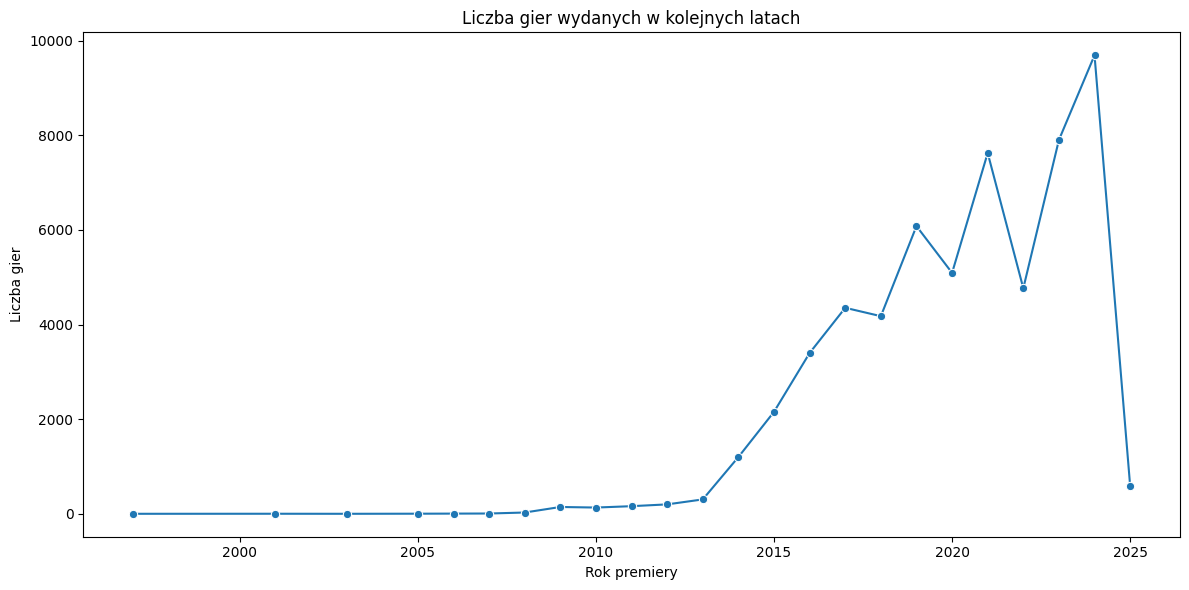

In [137]:
df_clean = df[df['release_date'] != 'Not Released'].copy()
df_clean['release_year'] = df_clean['release_date'].str[:4].astype(int)

releases_per_year = (
    df_clean
    .groupby('release_year')['steam_appid']
    .count()
    .reset_index(name='count')
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=releases_per_year,
    x='release_year',
    y='count',
    marker='o'
)
plt.xlabel('Rok premiery')
plt.ylabel('Liczba gier')
plt.title('Liczba gier wydanych w kolejnych latach')
plt.tight_layout()
plt.show()

#### Kluczowe wnioski
Widzimy, ze liczba wydawanych gier zaczęła gwałtownie wzrastać od roku 2013 i pomimo wahań raczej rośnie. W 2025 liczba wydanych gier jest bardzo mała, ale rok jeszcze się nie zakończył i prawdopodobnie dane nie są az tak aktualne. Takie liczby mogą wskazywać na wzrost aktywności małych twórców gier. 